In [112]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import optax
import numpy as np
import matplotlib.pyplot as plt

from sampling_utils import get_samples 
from training import fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initial Parameters

In [84]:
mu_0 = 1.
V_0 = 0.0001

A = .6
B = 1.

C = 1.
E = 1.

In [85]:
zs, xs = get_samples(100, 1000, mu_0, V_0, A, B, C, E)

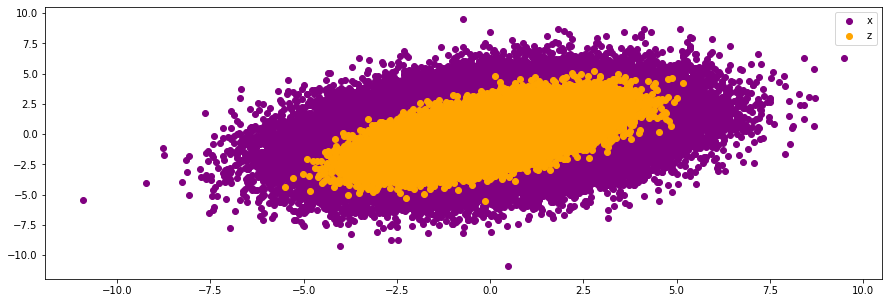

In [86]:
plt.figure(figsize=(15,5))
plt.scatter(xs[:-1], xs[1:], color="purple", label="x")
plt.scatter(zs[:-1], zs[1:], color="orange", label="z")
# plt.plot(list(range(1024)), [2 * x for x in range(1024)], color="green", label="f(x) = 2x")
plt.legend()
plt.show()

## Find optimal A using gradient estimators

We try to maximise the marginal likelihood $\max_{A} \mathbb{E}_{p(Z|A, B, \mu_0, V_0)} [p(X|Z, C, E)]$ w.r.t $A$, by using LR and RP gradient estimators together with an Adam optimiser until convergence.

We assume here all other parameters ($\mu_0, V_0, B, C, E$) are known.

In [162]:
N = 1000
num_inputs = 100
NUM_TRAIN_STEPS =2200
A = 1.4

# Set to False for RP gradient estimator
LR_ESTIMATOR = False

A_n = 1.7
_, xs = get_samples(num_inputs, N, mu_0, V_0, A, B, C, E)

init_param = jnp.array([A_n])

if LR_ESTIMATOR:
    optimizer = optax.adam(learning_rate=0.0005)
else:
    optimizer = optax.chain(
        optax.adam(learning_rate=0.0001),
        optax.scale(-1.0)
    )

optimizer.init(init_param)

learned_params, losses, gradients = fit(
    init_param,
    optimizer, 
    NUM_TRAIN_STEPS, 
    mu_0, V_0, A, B, C, E, xs, 
    num_inputs, 
    N, 
    lr_estimator=LR_ESTIMATOR,
)

Step 0, loss: 0.090000, grad: -0.004861, A - 1.699900
Step 100, loss: 0.084109, grad: -0.004895, A - 1.689915
Step 200, loss: 0.078376, grad: -0.005545, A - 1.679857
Step 300, loss: 0.072701, grad: -0.005231, A - 1.669525
Step 400, loss: 0.067029, grad: -0.006242, A - 1.658795
Step 500, loss: 0.061515, grad: -0.005762, A - 1.647913
Step 600, loss: 0.056134, grad: -0.005933, A - 1.636816
Step 700, loss: 0.050954, grad: -0.006540, A - 1.625613
Step 800, loss: 0.045883, grad: -0.006588, A - 1.614089
Step 900, loss: 0.041081, grad: -0.006760, A - 1.602569
Step 1000, loss: 0.036512, grad: -0.006837, A - 1.590966
Step 1100, loss: 0.032123, grad: -0.007582, A - 1.579112
Step 1200, loss: 0.027968, grad: -0.007680, A - 1.567116
Step 1300, loss: 0.023972, grad: -0.008559, A - 1.554706
Step 1400, loss: 0.020353, grad: -0.010716, A - 1.542536
Step 1500, loss: 0.016889, grad: -0.010005, A - 1.529827
Step 1600, loss: 0.013574, grad: -0.010694, A - 1.516372
Step 1700, loss: 0.010639, grad: -0.011795,

#### Loss plot

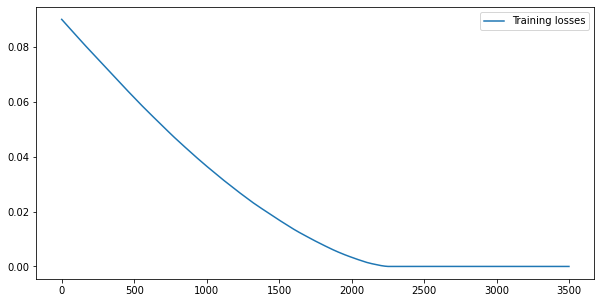

In [163]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label="Training losses")
plt.legend()
plt.show()

#### LDS produced with learned parameter

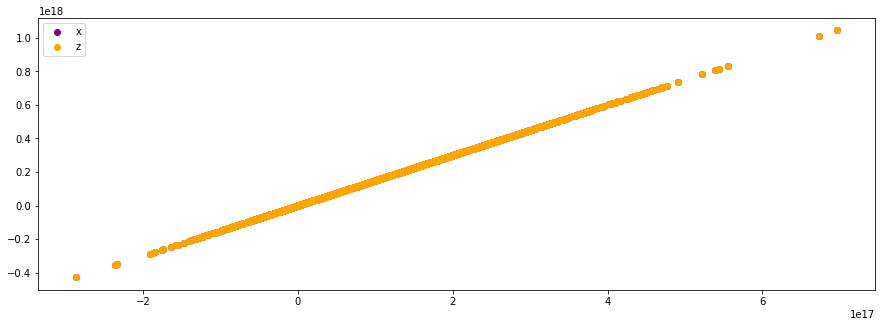

In [91]:
learned_A = learned_params[0]
zs, xs = get_samples(100, 1000, mu_0, V_0, learned_A, B, C, E)

plt.figure(figsize=(15,5))
plt.scatter(xs[:-1], xs[1:], color="purple", label="x")
plt.scatter(zs[:-1], zs[1:], color="orange", label="z")
plt.legend()
plt.show()